<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n250.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.689544,93.230552,56.059481,3934.819405,4139.798982,1087.652895,3052.146087
1,0.0,1.0,69.782538,98.819623,32.687845,2646.419176,2857.709182,-694.039253,3551.748434
2,0.0,2.0,52.700746,20.366996,40.159209,87.851156,211.078106,1741.279859,-1530.201753
3,0.0,3.0,56.425419,76.361274,81.108953,-9472.266665,-9248.371019,-263.459948,-8984.911071
4,0.0,4.0,20.481891,97.832446,71.987002,2820.794504,3021.095843,3010.655733,10.440109
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.863143,34.654314,72.439801,-499.858718,-309.901460,-438.742090,128.840630
19996,999.0,16.0,45.397153,90.015096,48.560874,8581.133198,8775.106321,-1334.972760,10110.079081
19997,999.0,17.0,28.865311,59.870335,94.265127,-1435.396774,-1242.396001,633.037616,-1875.433617
19998,999.0,18.0,35.518572,21.457798,43.745025,1059.558007,1170.279402,-1672.042158,2842.321560


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.689544,93.230552,56.059481,3934.819405,4139.798982,1087.652895,3052.146087
1,0.0,1.0,69.782538,98.819623,32.687845,2646.419176,2857.709182,-694.039253,3551.748434
2,0.0,2.0,52.700746,20.366996,40.159209,87.851156,211.078106,1741.279859,-1530.201753
3,0.0,3.0,56.425419,76.361274,81.108953,-9472.266665,-9248.371019,-263.459948,-8984.911071
4,0.0,4.0,20.481891,97.832446,71.987002,2820.794504,3021.095843,3010.655733,10.440109
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.863143,34.654314,72.439801,-499.858718,-309.901460,-438.742090,128.840630
19996,999.0,16.0,45.397153,90.015096,48.560874,8581.133198,8775.106321,-1334.972760,10110.079081
19997,999.0,17.0,28.865311,59.870335,94.265127,-1435.396774,-1242.396001,633.037616,-1875.433617
19998,999.0,18.0,35.518572,21.457798,43.745025,1059.558007,1170.279402,-1672.042158,2842.321560


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    45.689544  93.230552  ...  1087.652895   3052.146087
      1.0    69.782538  98.819623  ...  -694.039253   3551.748434
      2.0    52.700746  20.366996  ...  1741.279859  -1530.201753
      3.0    56.425419  76.361274  ...  -263.459948  -8984.911071
      4.0    20.481891  97.832446  ...  3010.655733     10.440109
...                ...        ...  ...          ...           ...
999.0 15.0   72.863143  34.654314  ...  -438.742090    128.840630
      16.0   45.397153  90.015096  ... -1334.972760  10110.079081
      17.0   28.865311  59.870335  ...   633.037616  -1875.433617
      18.0   35.518572  21.457798  ... -1672.042158   2842.321560
      19.0   48.406280  48.625059  ... -1553.635930    399.104354

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    45.689544  93.230552  ...  1087.652895   3052.146087
      1.0    69.782538  98.819623  ...  -694.039253   3551.748434
      2.0    52.700746  20.366996  ...  1741.279859  -1530.201753
      3.0    56.425419  76.361274  ...  -263.459948  -8984.911071
      4.0    20.481891  97.832446  ...  3010.655733     10.440109
...                ...        ...  ...          ...           ...
999.0 15.0   72.863143  34.654314  ...  -438.742090    128.840630
      16.0   45.397153  90.015096  ... -1334.972760  10110.079081
      17.0   28.865311  59.870335  ...   633.037616  -1875.433617
      18.0   35.518572  21.457798  ... -1672.042158   2842.321560
      19.0   48.406280  48.625059  ... -1553.635930    399.104354

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.689544,93.230552,56.059481,3934.819405,4139.798982,1087.652895,3052.146087
1,0.0,1.0,69.782538,98.819623,32.687845,2646.419176,2857.709182,-694.039253,3551.748434
2,0.0,2.0,52.700746,20.366996,40.159209,87.851156,211.078106,1741.279859,-1530.201753
3,0.0,3.0,56.425419,76.361274,81.108953,-9472.266665,-9248.371019,-263.459948,-8984.911071
4,0.0,4.0,20.481891,97.832446,71.987002,2820.794504,3021.095843,3010.655733,10.440109
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.863143,34.654314,72.439801,-499.858718,-309.901460,-438.742090,128.840630
19996,999.0,16.0,45.397153,90.015096,48.560874,8581.133198,8775.106321,-1334.972760,10110.079081
19997,999.0,17.0,28.865311,59.870335,94.265127,-1435.396774,-1242.396001,633.037616,-1875.433617
19998,999.0,18.0,35.518572,21.457798,43.745025,1059.558007,1170.279402,-1672.042158,2842.321560


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    45.689544  93.230552  ...  1087.652895   3052.146087
      1.0    69.782538  98.819623  ...  -694.039253   3551.748434
      2.0    52.700746  20.366996  ...  1741.279859  -1530.201753
      3.0    56.425419  76.361274  ...  -263.459948  -8984.911071
      4.0    20.481891  97.832446  ...  3010.655733     10.440109
...                ...        ...  ...          ...           ...
999.0 15.0   72.863143  34.654314  ...  -438.742090    128.840630
      16.0   45.397153  90.015096  ... -1334.972760  10110.079081
      17.0   28.865311  59.870335  ...   633.037616  -1875.433617
      18.0   35.518572  21.457798  ... -1672.042158   2842.321560
      19.0   48.406280  48.625059  ... -1553.635930    399.104354

[20000 rows x 7 columns]

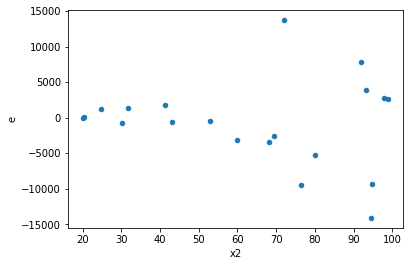

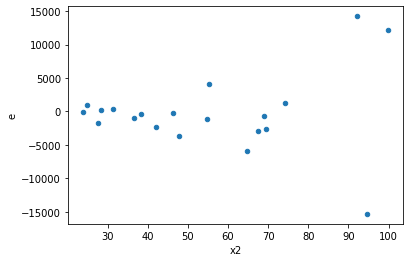

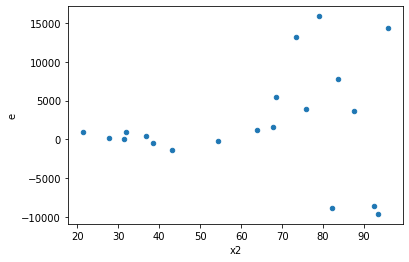

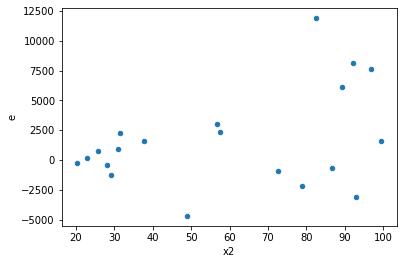

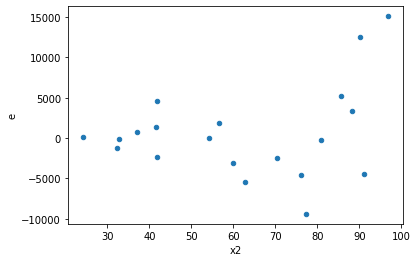

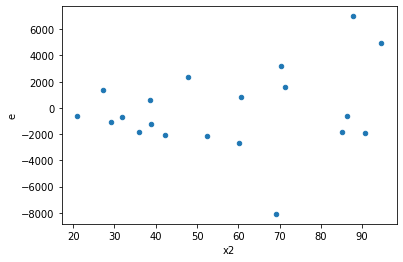

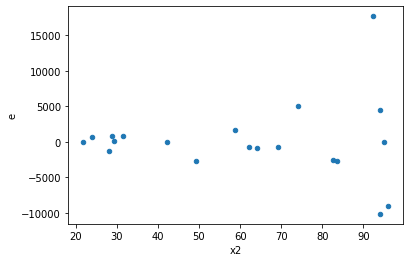

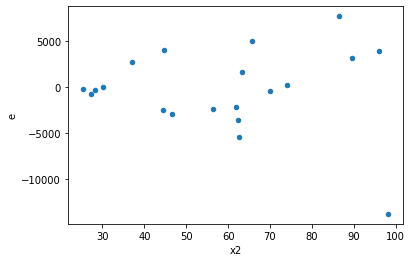

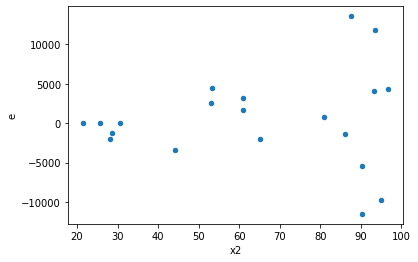

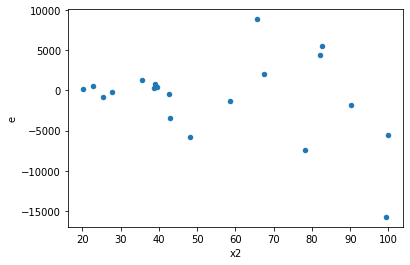

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,5.0,17987006.803142667,67171758.9762413,3597401.360628533,13434351.79524826,3.734460086183163,0.17448911888595764,0.9127554405570212,0.08724455944297882,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,58268993.61837904,429121753.5628747,11653798.723675808,85824350.71257493,7.3644957105887325,0.0469791963243289,0.9765104018378356,0.02348959816216445,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,20542732.568429388,151959028.81764504,4108546.5136858774,30391805.76352901,7.397215940550173,0.046548166557296655,0.9767259167213517,0.023274083278648328,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,55022471.95540233,243842270.18684176,11004494.391080465,48768454.03736835,4.431685119208832,0.12798955068337925,0.9360052246583104,0.06399477534168962,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,14991026.52325475,181172134.74688658,2998205.3046509502,36234426.94937731,12.085372170200904,0.016126660164447193,0.9919366699177764,0.008063330082223596,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,9346987.583314776,28773495.76725885,1869397.5166629553,5754699.15345177,3.0783710271127522,0.24267774146674048,0.8786611292666298,0.12133887073337024,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,6648868.027130434,165810603.7501288,1329773.6054260868,33162120.75002576,24.938170388334587,0.003040892229565051,0.9984795538852175,0.0015204461147825254,Reject001=0 : Heteroscedasticity
9.0,5.0,5.0,20815206.062441926,50580470.03021331,4163041.2124883854,10116094.006042663,2.429976906232918,0.3521084081067696,0.8239457959466152,0.1760542040533848,Reject001=1 : Homoscedasticity
13.0,5.0,5.0,5866626.549651482,327343605.83171356,1173325.3099302964,65468721.16634271,55.797587090516274,0.0004384923165348109,0.9997807538417326,0.00021924615826740546,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,158865998.10709935,104195509.04683816,31773199.62141987,20839101.809367634,0.6558704209103,0.65475657512876,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,17987006.803142667,67171758.9762413,3597401.360628533,13434351.79524826,3.734460086183163,0.17448911888595764,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,58268993.61837904,429121753.5628747,11653798.723675808,85824350.71257493,7.3644957105887325,0.0469791963243289,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,20542732.568429388,151959028.81764504,4108546.5136858774,30391805.76352901,7.397215940550173,0.046548166557296655,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,55022471.95540233,243842270.18684176,11004494.391080465,48768454.03736835,4.431685119208832,0.12798955068337925,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,44944798.0325099,18804129.890511204,8988959.60650198,3760825.9781022407,0.4183827876345027,0.3608852465289739,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,14991026.52325475,181172134.74688658,2998205.3046509502,36234426.94937731,12.085372170200904,0.016126660164447193,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,9346987.583314776,28773495.76725885,1869397.5166629553,5754699.15345177,3.0783710271127522,0.24267774146674048,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,6648868.027130434,165810603.7501288,1329773.6054260868,33162120.75002576,24.938170388334587,0.003040892229565051,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      753
Reject001=0 : Heteroscedasticity    247
Name: Result_test, dtype: int64